In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import cv2

In [ ]:
# do not run this cell
# main_folder = "/content/drive/MyDrive/raw_dataset/plant_village"

# # Function to extract information from folder and image names
# def extract_info(folder_name, image_name):
#     parts = folder_name.split("__")
#     plant = parts[0]
#     disease = parts[1] if len(parts) > 1 else ""
#     healthy = 1 if disease == "healthy" else 0
#     width, height = 0, 0
#     img = cv2.imread(os.path.join(main_folder, folder_name, image_name))
#     if img is not None:
#         height, width, _ = img.shape
#     return plant, disease, healthy, width, height, image_name, os.path.splitext(image_name)[1]


# data = []

# # Traverse through main folder
# for root, dirs, files in os.walk(main_folder):
#     for folder in dirs:
#         folder_path = os.path.join(root, folder)
#         for img_file in os.listdir(folder_path):
#             plant, disease, healthy, width, height, image_name, extension = extract_info(folder, img_file)
#             data.append([plant, disease, healthy, width, height, image_name, extension])

# df = pd.DataFrame(data, columns=['plant', 'disease', 'healthy', 'width', 'height', 'image_name', 'extension'])



# df.to_csv('/content/drive/MyDrive/raw_dataset/image_info.csv', index=False)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/raw_dataset/image_info.csv')

df.head()

,plant,disease,healthy,width,height,image_name,extension
0,Strawberry,_healthy,0,256,256,27380fd9-9d5d-41b2-b4a4-f1c1f1fd58ab___RS_HL 1...,.JPG
1,Strawberry,_healthy,0,256,256,7673a7d4-c27f-44c5-96a8-c9f133878ba0___RS_HL 2...,.JPG
2,Strawberry,_healthy,0,256,256,02caa98d-1c74-43b3-b3ee-e8492998f82a___RS_HL 2...,.JPG
3,Strawberry,_healthy,0,256,256,998f4c67-2e7e-4881-a865-4ce2dc940a43___RS_HL 1...,.JPG
4,Strawberry,_healthy,0,256,256,24077dde-8ba8-4a61-ba95-92958347da79___RS_HL 2...,.JPG


In [5]:
df.disease.value_counts()

disease
_healthy                               3908
_Early_blight                           965
_Late_blight                            948
_Haunglongbing_(Citrus_greening)        503
_Esca_(Black_Measles)                   480
_Common_rust_                           477
_Black_rot                              472
_Leaf_Mold                              470
_Target_Spot                            457
_Tomato_mosaic_virus                    448
_Cedar_apple_rust                       440
_Leaf_blight_(Isariopsis_Leaf_Spot)     430
_Bacterial_spot                         425
_Powdery_mildew                         421
Name: count, dtype: int64

In [6]:
df.healthy.unique()

array([0])

In [7]:
df['disease'] = df['disease'].str.replace('_', '')

In [8]:
df.loc[df['disease'] == 'healthy', 'healthy'] = 1

In [9]:
df.rename(columns={'healthy': 'is_healthy'}, inplace=True)

In [14]:
# class to do the classification based on
df['class'] = df['plant'] + '__' + df['disease']

In [15]:
df.head()

,plant,disease,is_healthy,width,height,image_name,extension,class
0,Strawberry,healthy,1,256,256,27380fd9-9d5d-41b2-b4a4-f1c1f1fd58ab___RS_HL 1...,.JPG,Strawberry__healthy
1,Strawberry,healthy,1,256,256,7673a7d4-c27f-44c5-96a8-c9f133878ba0___RS_HL 2...,.JPG,Strawberry__healthy
2,Strawberry,healthy,1,256,256,02caa98d-1c74-43b3-b3ee-e8492998f82a___RS_HL 2...,.JPG,Strawberry__healthy
3,Strawberry,healthy,1,256,256,998f4c67-2e7e-4881-a865-4ce2dc940a43___RS_HL 1...,.JPG,Strawberry__healthy
4,Strawberry,healthy,1,256,256,24077dde-8ba8-4a61-ba95-92958347da79___RS_HL 2...,.JPG,Strawberry__healthy


In [ ]:
df.is_healthy.unique()

array([1, 0])

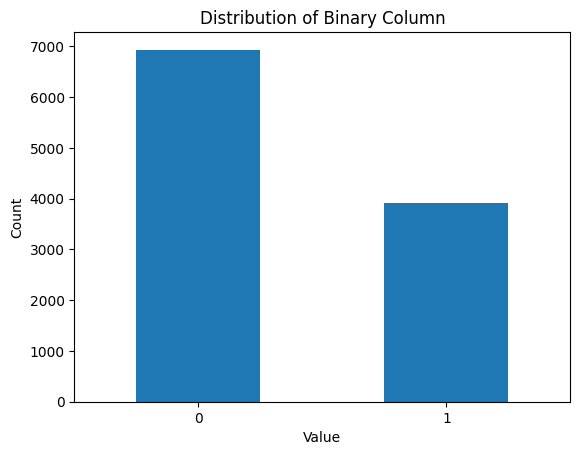

In [13]:
df['is_healthy'].value_counts().plot(kind='bar', title='Distribution of Binary Column')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

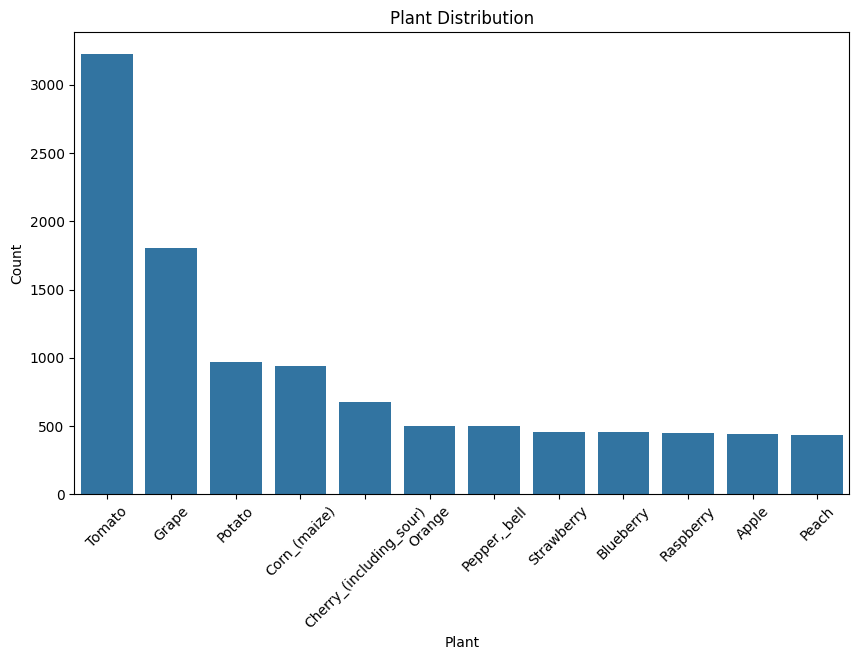

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='plant', order=df['plant'].value_counts().index)
plt.title('Plant Distribution')
plt.xlabel('Plant')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

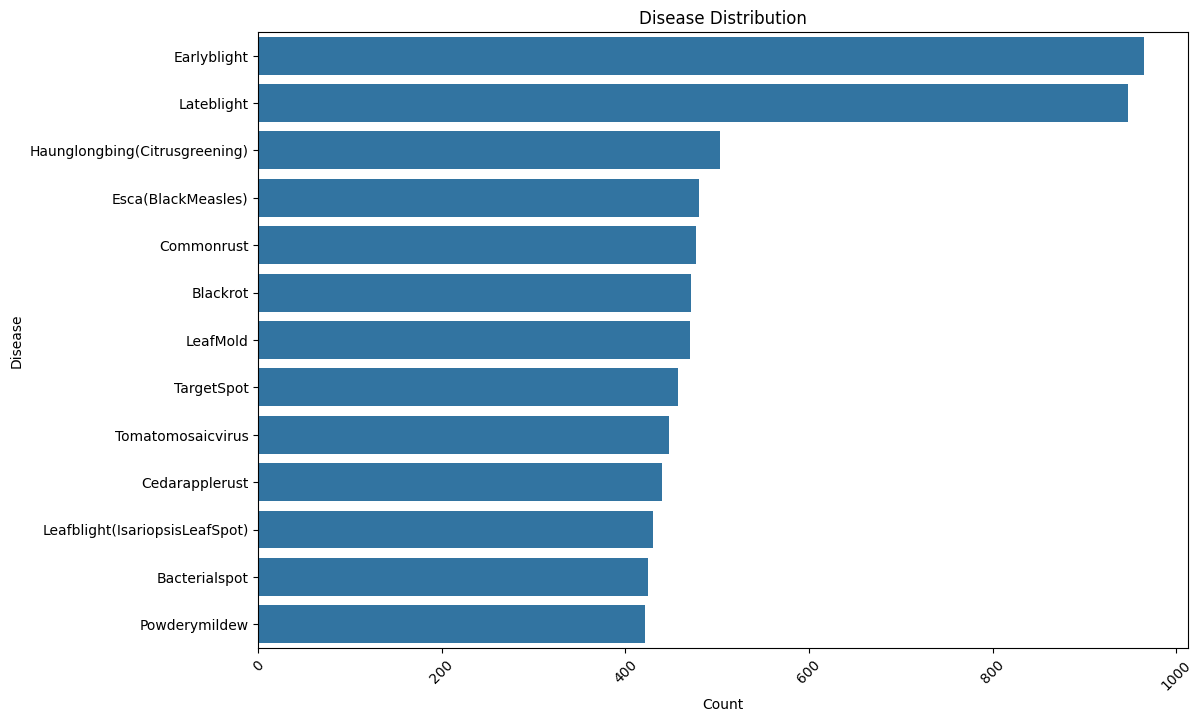

In [17]:
df_healthy_filtered = df[df['disease'] != 'healthy']

plt.figure(figsize=(12, 8))
sns.countplot(data=df_healthy_filtered, y='disease', order=df_healthy_filtered['disease'].value_counts().index)
plt.title('Disease Distribution')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.xticks(rotation=45)
plt.show()

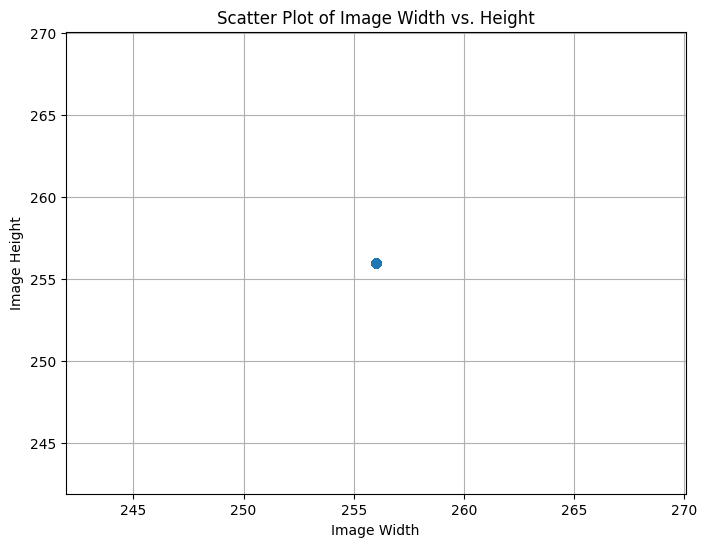

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df['width'], df['height'], alpha=0.8)
plt.title('Scatter Plot of Image Width vs. Height')
plt.xlabel('Image Width')
plt.ylabel('Image Height')
plt.grid(True)
plt.show()

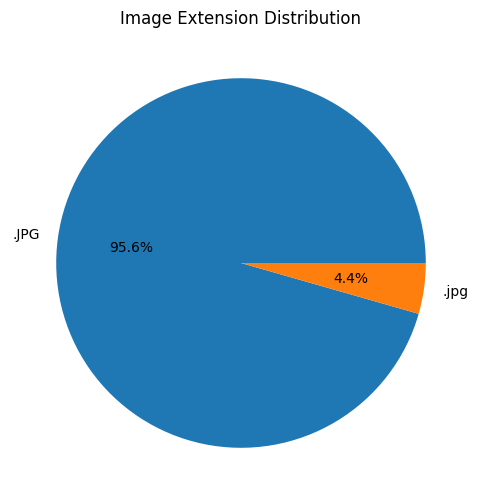

In [19]:
plt.figure(figsize=(8, 6))
df['extension'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Image Extension Distribution')
plt.ylabel('')
plt.show()

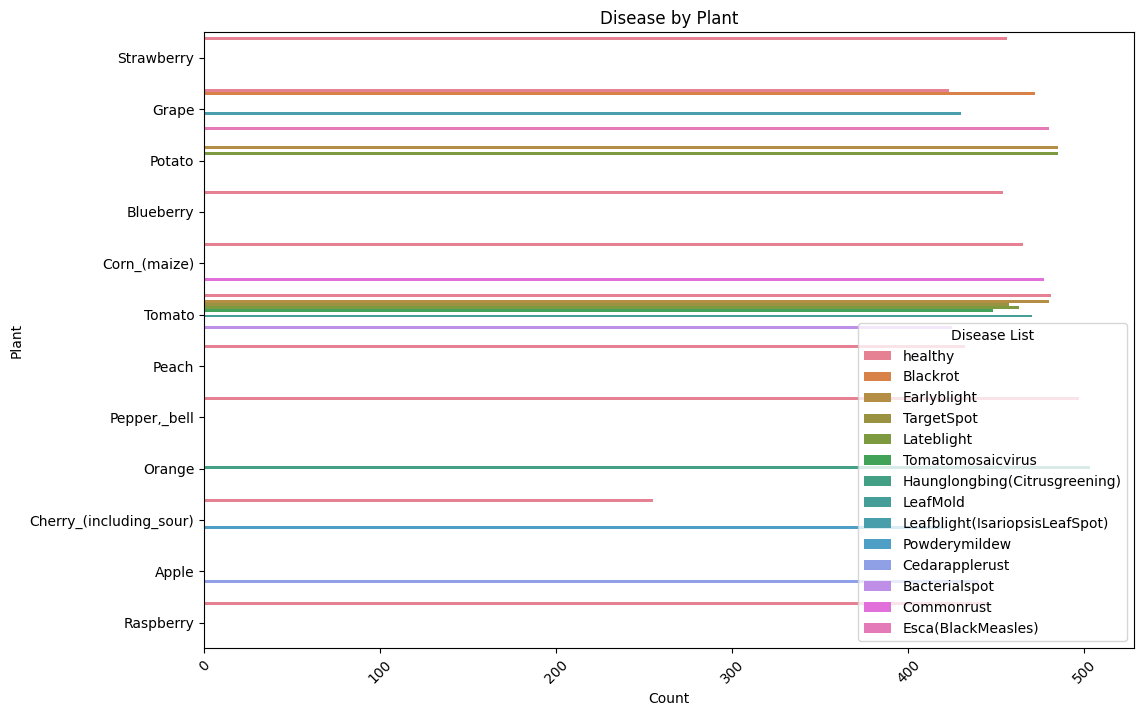

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='plant', hue='disease')
plt.title('Disease by Plant')
plt.xlabel('Count')
plt.ylabel('Plant')
plt.xticks(rotation=45)
plt.legend(title='Disease List')
plt.show()

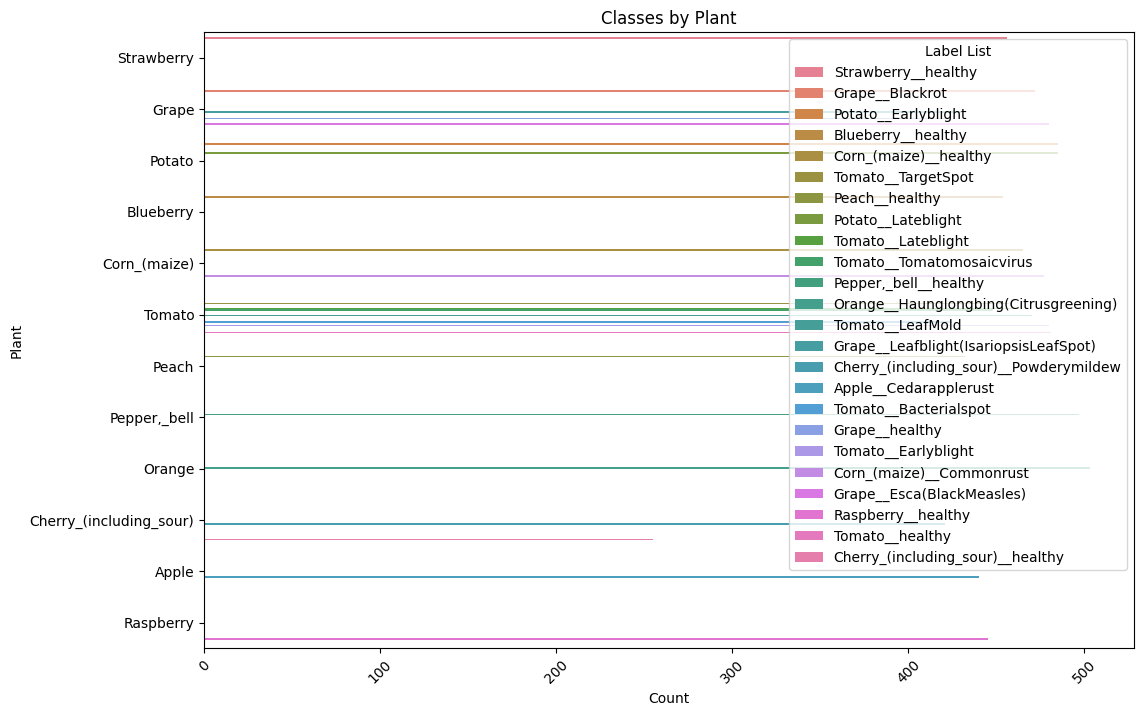

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='plant', hue='class')
plt.title('Classes by Plant')
plt.xlabel('Count')
plt.ylabel('Plant')
plt.xticks(rotation=45)
plt.legend(title='Label List')
plt.show()

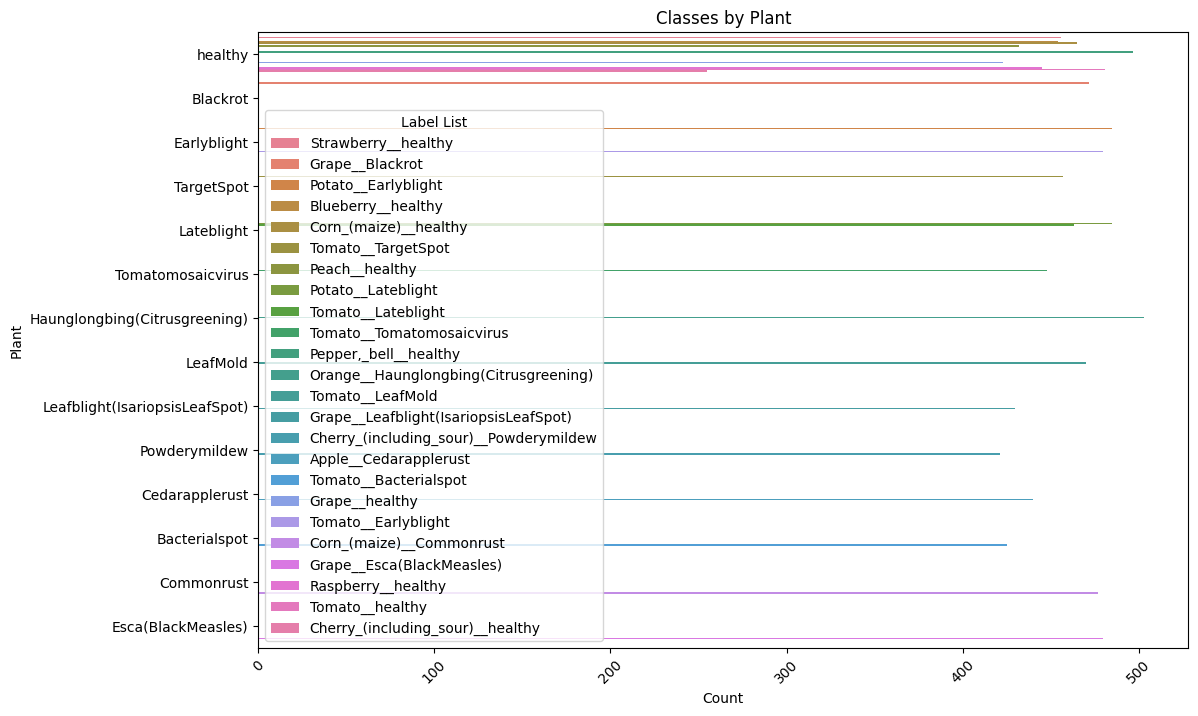

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='disease', hue='class')
plt.title('Classes by Plant')
plt.xlabel('Count')
plt.ylabel('Plant')
plt.xticks(rotation=45)
plt.legend(title='Label List')
plt.show()

In [ ]:
# Luigi dataset
luig_data = pd.read_csv('/content/drive/MyDrive/raw_dataset/export_dataframe.csv')
luig_data.head()

,Unnamed: 0,Plant,Healthy,Illness,Image_name,Image_width,Image_height,Image_format,Image_mode
0,0,Tomato,0,Tomato_Yellow_Leaf_Curl_Virus,a89d28eb-a4c5-41cc-8588-b5f44e139282___UF.GRC_...,256,256,JPEG,RGB
1,1,Tomato,0,Tomato_Yellow_Leaf_Curl_Virus,ddeecf68-bc10-4715-8fb9-55e227138dc8___UF.GRC_...,256,256,JPEG,RGB
2,2,Tomato,0,Tomato_Yellow_Leaf_Curl_Virus,c7a13d76-b20c-4ec5-be26-5d59eb5bb84e___YLCV_NR...,256,256,JPEG,RGB
3,3,Tomato,0,Tomato_Yellow_Leaf_Curl_Virus,df50d3b3-8873-40a4-83b2-f951341e430b___UF.GRC_...,256,256,JPEG,RGB
4,4,Tomato,0,Tomato_Yellow_Leaf_Curl_Virus,680826bf-080d-4fc9-9148-2bb2398b4503___UF.GRC_...,256,256,JPEG,RGB


In [ ]:
the_data = luig_data.copy()
the_data.columns

Index(['Unnamed: 0', 'Plant', 'Healthy', 'Illness', 'Image_name',
       'Image_width', 'Image_height', 'Image_format', 'Image_mode'],
      dtype='object')

In [ ]:
len(the_data)

70295

In [ ]:
the_data.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
the_data.head()

,Plant,Healthy,Illness,Image_name,Image_width,Image_height,Image_format,Image_mode
0,Tomato,0,Tomato_Yellow_Leaf_Curl_Virus,a89d28eb-a4c5-41cc-8588-b5f44e139282___UF.GRC_...,256,256,JPEG,RGB
1,Tomato,0,Tomato_Yellow_Leaf_Curl_Virus,ddeecf68-bc10-4715-8fb9-55e227138dc8___UF.GRC_...,256,256,JPEG,RGB
2,Tomato,0,Tomato_Yellow_Leaf_Curl_Virus,c7a13d76-b20c-4ec5-be26-5d59eb5bb84e___YLCV_NR...,256,256,JPEG,RGB
3,Tomato,0,Tomato_Yellow_Leaf_Curl_Virus,df50d3b3-8873-40a4-83b2-f951341e430b___UF.GRC_...,256,256,JPEG,RGB
4,Tomato,0,Tomato_Yellow_Leaf_Curl_Virus,680826bf-080d-4fc9-9148-2bb2398b4503___UF.GRC_...,256,256,JPEG,RGB


In [ ]:
# Bernd Dataset
bernd_data = pd.read_csv('/content/drive/MyDrive/raw_dataset/bernd_export_dataframe.csv')
bernd_data.head()

,Unnamed: 0,Dataset,Plant,Healthy,Illness,Image_name,Image_width,Image_height,Image_format,Image_mode
0,0,New_Plant_Diseases_Dataset,Apple,0,Apple_scab,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,256,256,JPEG,RGB
1,1,New_Plant_Diseases_Dataset,Apple,0,Apple_scab,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,256,256,JPEG,RGB
2,2,New_Plant_Diseases_Dataset,Apple,0,Apple_scab,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,256,256,JPEG,RGB
3,3,New_Plant_Diseases_Dataset,Apple,0,Apple_scab,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,256,256,JPEG,RGB
4,4,New_Plant_Diseases_Dataset,Apple,0,Apple_scab,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,256,256,JPEG,RGB


In [ ]:
# Alex Dataset
alex_data = pd.read_csv('/content/drive/MyDrive/raw_dataset/alex_preprocessed_metadata.csv')
alex_data.head()

,width_px,height_px,bits_p_px,px_format,mime,species,disease,isDisease,isDisease_0,isDisease_1,isDisease_None,isSpecies,isSeedling,isSeedling_0,isSeedling_1,isSeedling_None
0,256,256,24,YCbCr,jpeg,Apple,Apple_scab,1.0,0,1,0,1,0.0,1,0,0
1,256,256,24,YCbCr,jpeg,Apple,Apple_scab,1.0,0,1,0,1,0.0,1,0,0
2,256,256,24,YCbCr,jpeg,Apple,Apple_scab,1.0,0,1,0,1,0.0,1,0,0
3,256,256,24,YCbCr,jpeg,Apple,Apple_scab,1.0,0,1,0,1,0.0,1,0,0
4,256,256,24,YCbCr,jpeg,Apple,Apple_scab,1.0,0,1,0,1,0.0,1,0,0


In [ ]:
len(alex_data)

60987